# Autoencoders


This code includes implementations of various simple autoencoders using the Keras front end to TensorFlow.
We'll run all of the code on the MNIST data to gain a basic understanding of what everything is doing. 
You'll then run this on the Fashion MNIST data.

The starter code for this demo is from [https://github.com/ardendertat/Applied-Deep-Learning-with-Keras](https://github.com/ardendertat/Applied-Deep-Learning-with-Keras). For Keras documentation, see [https://keras.io](https://keras.io).



In [1]:
from __future__ import print_function
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.regularizers import l1
from tensorflow.keras.optimizers import Adam

## Utility functions



In [2]:
def plot_autoencoder_outputs(autoencoder, n, dims):
    decoded_imgs = autoencoder.predict(x_test)

    # number of example digits to show
    plt.figure(figsize=(2*n, 4.5))
    for i in range(n):
        # plot original image
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Original Images')

        # plot reconstruction 
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Reconstructed Images')
    plt.show()


## Read the data


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


## Shallow autoencoder


In [4]:
input_size = 784
code_size = 32

input_img = Input(shape=(input_size,))
code = Dense(code_size, activation='relu')(input_img)
output_img = Dense(input_size, activation='sigmoid')(code)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(x_train, x_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 740us/step - loss: 0.0527
Epoch 2/10
1875/1875 [==============================] - 1s 742us/step - loss: 0.0150
Epoch 3/10
1875/1875 [==============================] - 1s 754us/step - loss: 0.0114
Epoch 4/10
1875/1875 [==============================] - 2s 839us/step - loss: 0.0108
Epoch 5/10
1875/1875 [==============================] - 2s 909us/step - loss: 0.0106
Epoch 6/10
1875/1875 [==============================] - 2s 800us/step - loss: 0.0105
Epoch 7/10
1875/1875 [==============================] - 1s 791us/step - loss: 0.0104
Epoch 8/10
1875/1875 [==============================] - 1s 784us/step - loss: 0.0103
Epoch 9/10
1875/1875 [==============================] - 2s 801us/step - loss: 0.0103
Epoch 10/10
1875/1875 [==============================] - 1s 764us/step - loss: 0.0103


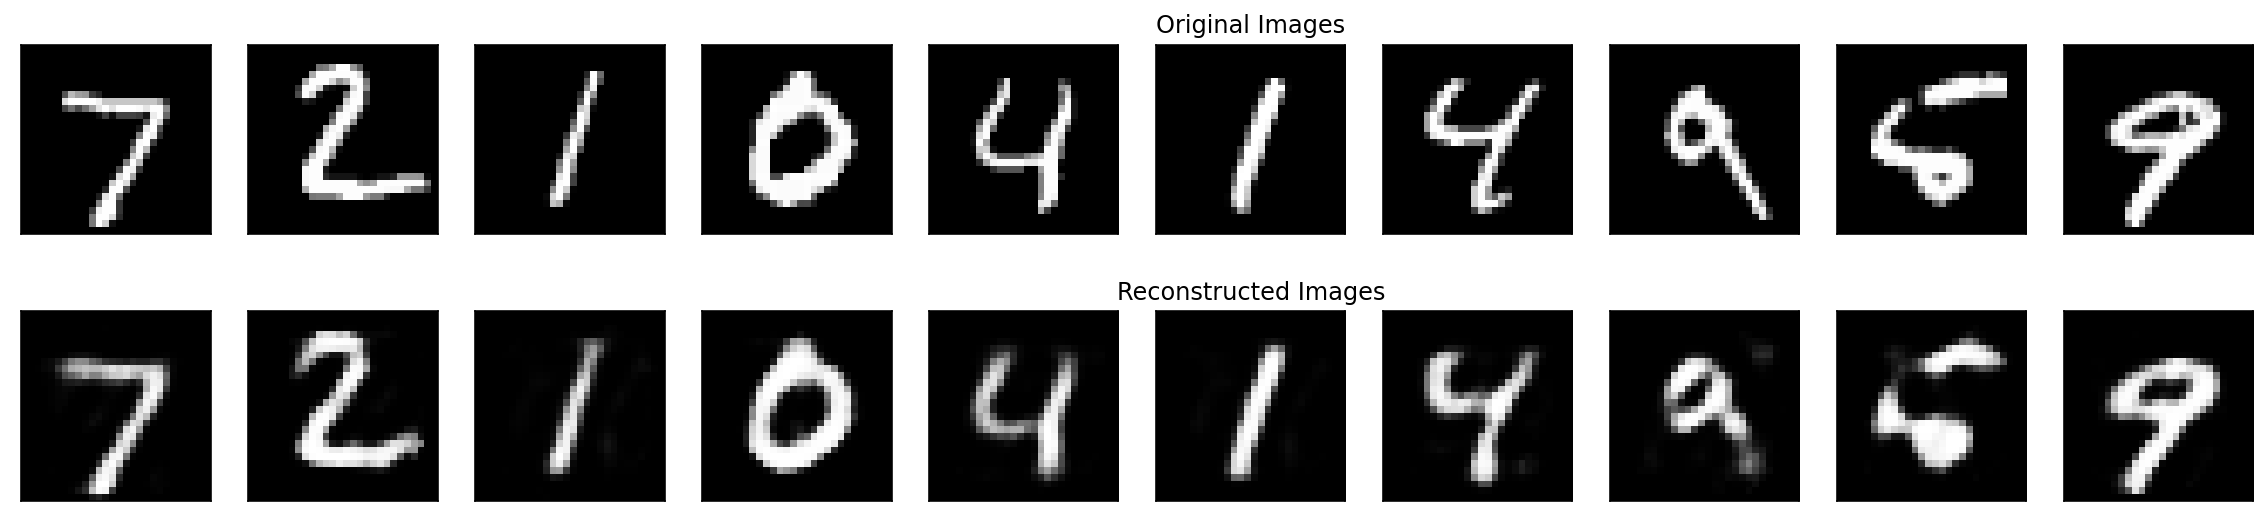

In [5]:
plot_autoencoder_outputs(autoencoder, 10, (28, 28))

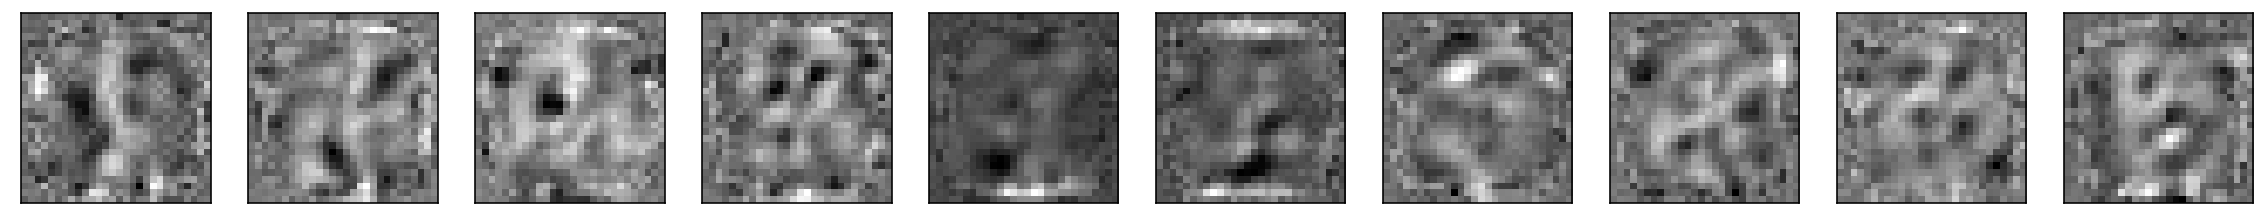

In [6]:
weights = autoencoder.get_weights()[0].T

n = 10
plt.figure(figsize=(n*2, 5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(weights[i+0].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

## 2-Layer Autoencoder


In [7]:
input_size = 784
hidden_size = 64
code_size = 8

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2355
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1506
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1430
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1390
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1367
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1347
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1339
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1329
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1320
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1313


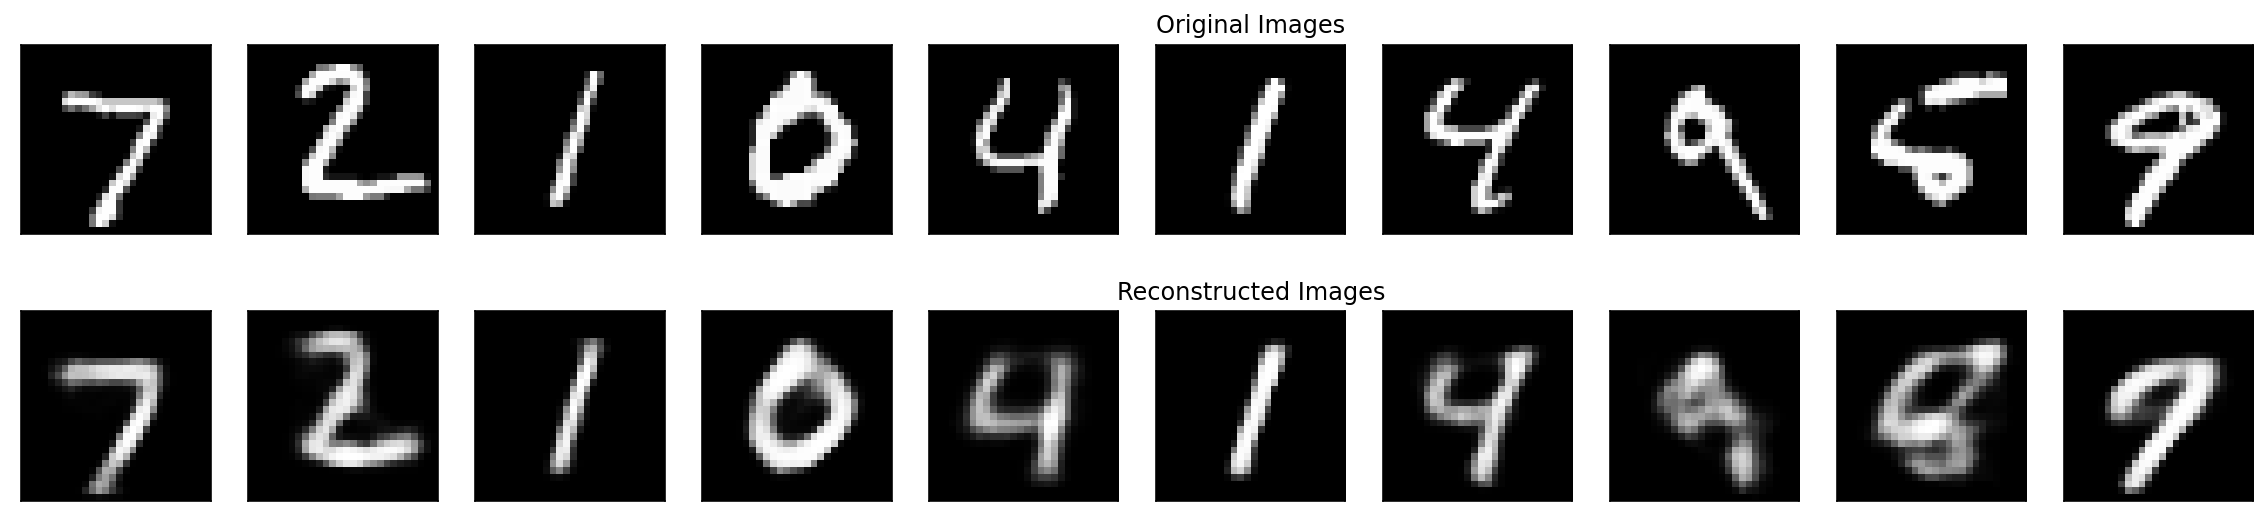

In [8]:
plot_autoencoder_outputs(autoencoder, 10, (28, 28))

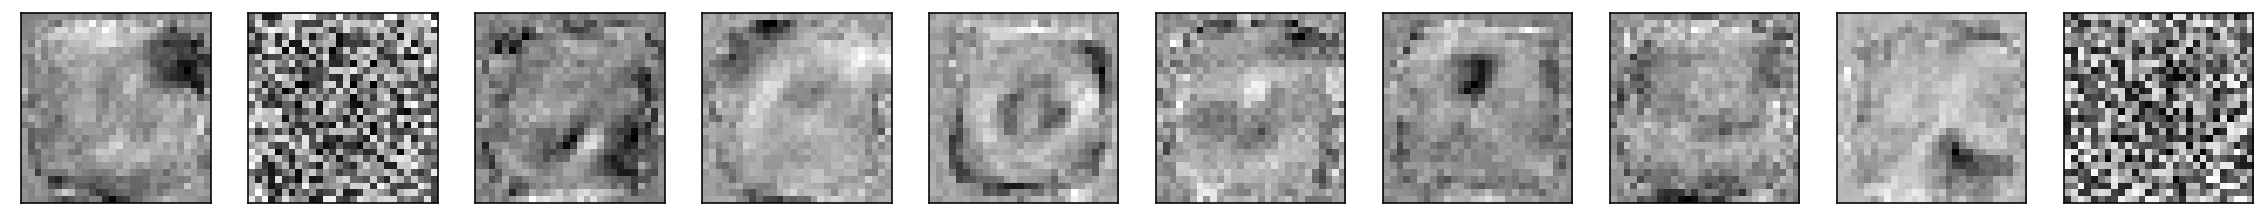

In [9]:
weights = autoencoder.get_weights()[0].T

n = 10
plt.figure(figsize=(20, 5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(weights[i+0].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    

## Denoising autoencoder


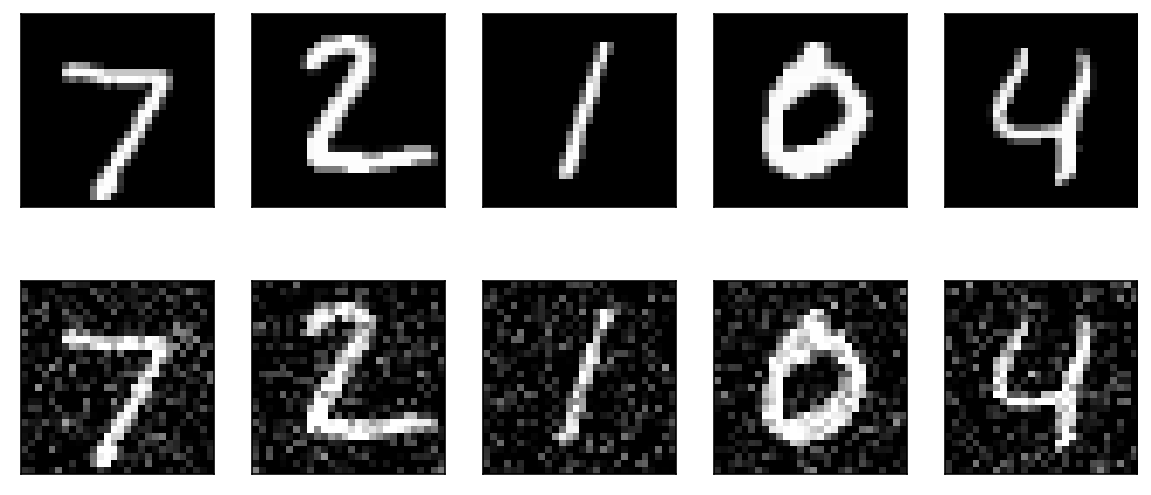

In [10]:
noise_factor = 0.20
x_train_noisy = x_train + noise_factor * np.random.normal(size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

n = 5
plt.figure(figsize=(10, 4.5))
for i in range(n):
    # plot original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Original Images')

    # plot noisy image 
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Noisy Input')

In [11]:
input_size = 784
hidden_size = 128
code_size = 32

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1966
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1124
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1045
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1009
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0986
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0975
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0965
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0958
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0950
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0944


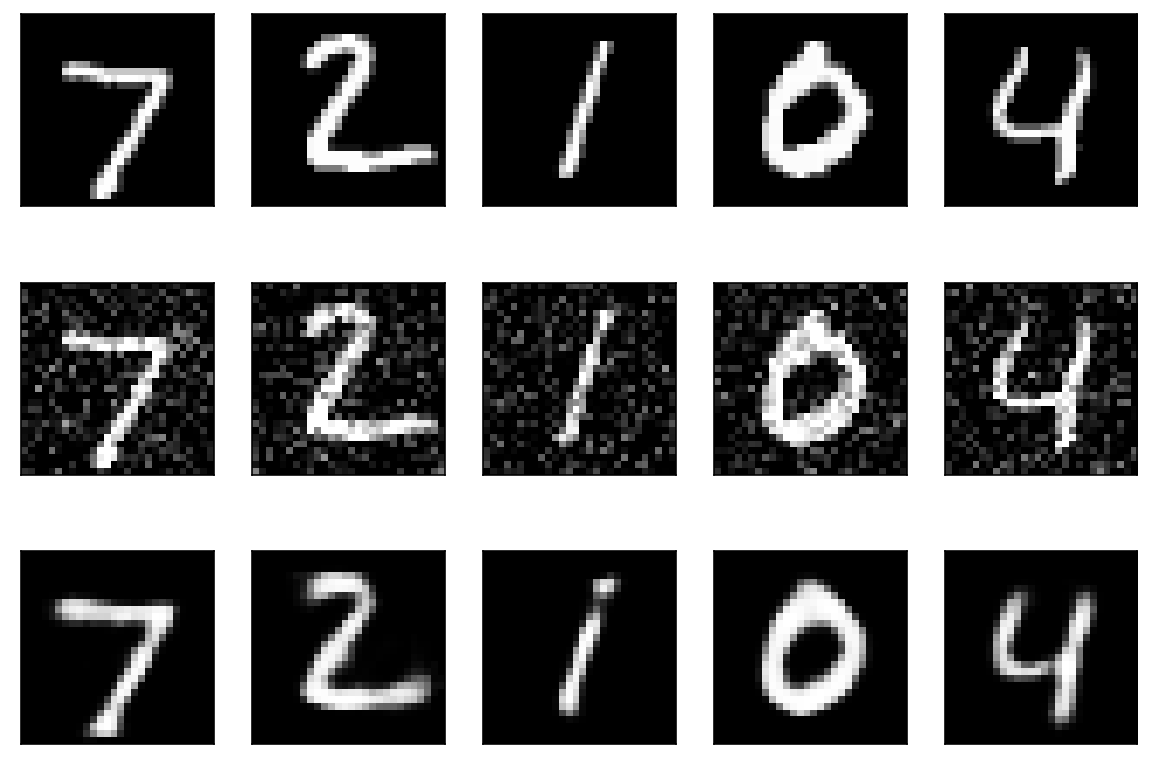

In [12]:
n = 5
plt.figure(figsize=(10, 7))

images = autoencoder.predict(x_test_noisy)

for i in range(n):
    # plot original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Original Images')

    # plot noisy image 
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Noisy Input')
        
    # plot noisy image 
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Autoencoder Output')

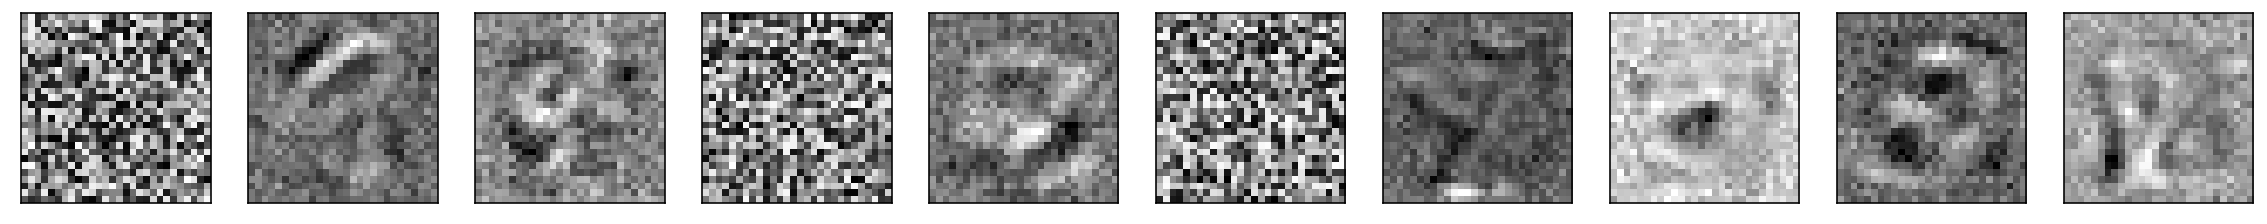

In [13]:
weights = autoencoder.get_weights()[0].T

n = 10
plt.figure(figsize=(20, 5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(weights[i+0].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


## Sparse autoencoders


In [14]:
input_size = 784
hidden_size = 128
code_size = 32

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder_standard = Model(input_img, output_img)
autoencoder_standard.compile(optimizer='adam', loss='binary_crossentropy')
history_standard = autoencoder_standard.fit(x_train, x_train, epochs=20)

encoded_standard = Model(input_img, code)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1893
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1013
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0944
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0910
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0892
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0876
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0868
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0857
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0852
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0848
Epoch 11/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0841
Epoch 12/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0838
E

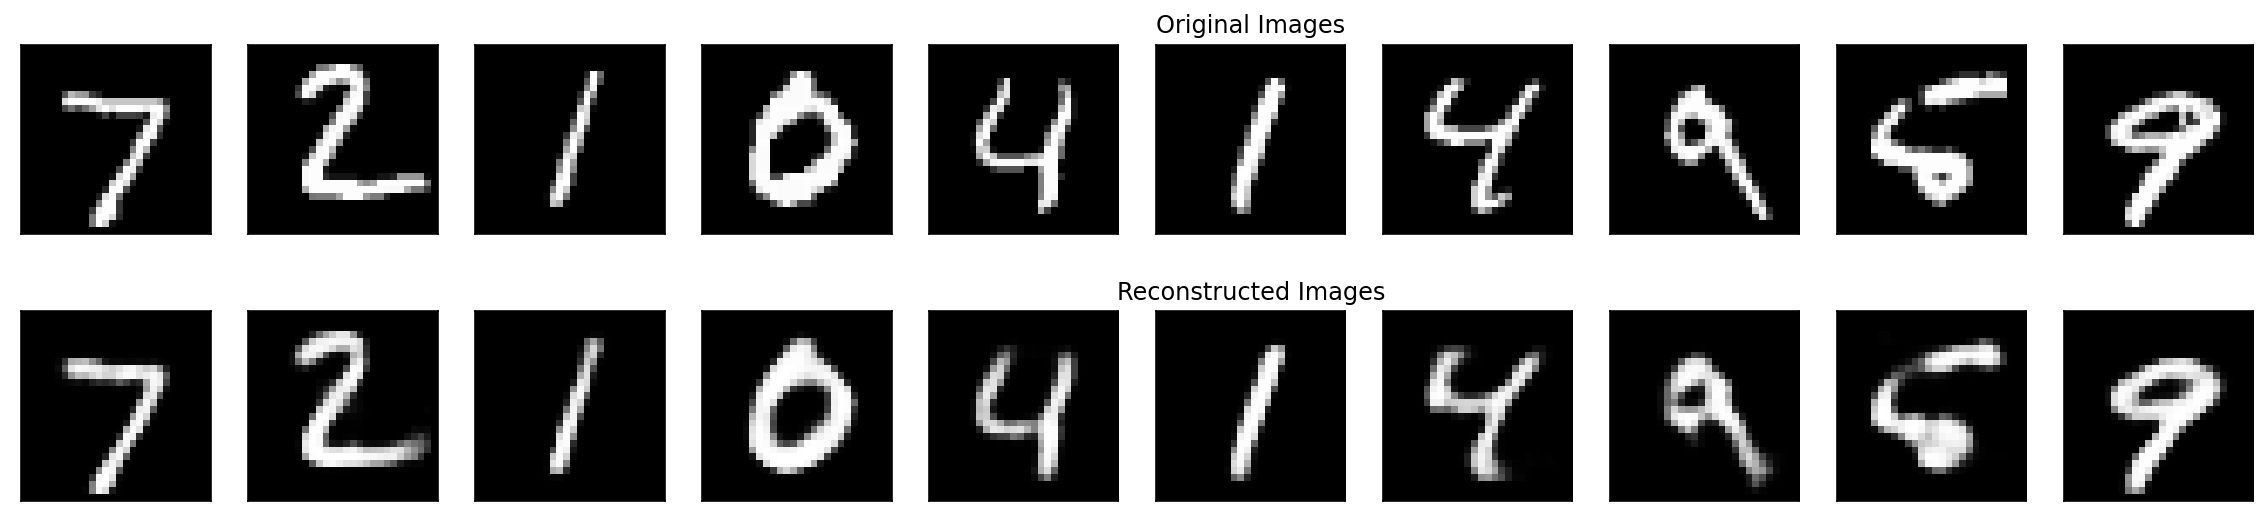

In [15]:
plot_autoencoder_outputs(autoencoder_standard, 10, (28, 28))

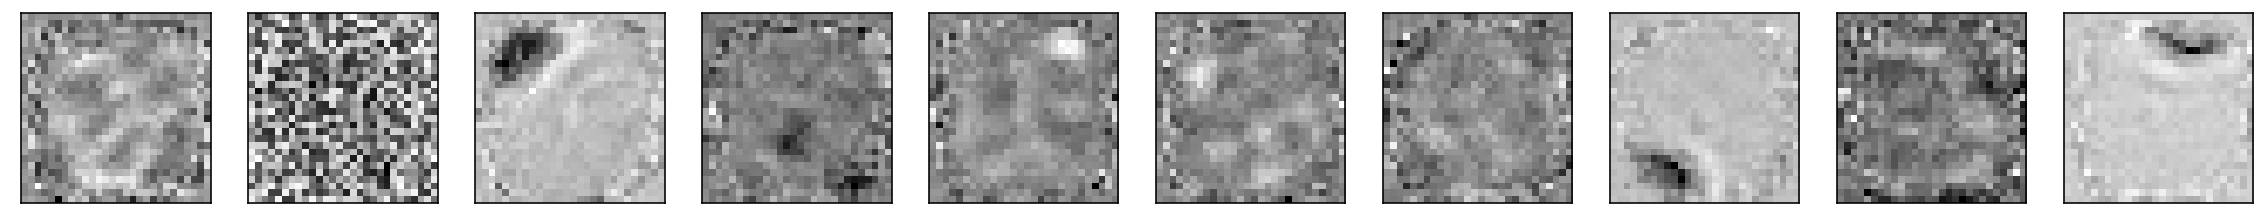

In [16]:
weights = autoencoder_standard.get_weights()[0].T

n = 10
plt.figure(figsize=(n*2, 5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(weights[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [17]:
input_size = 784
hidden_size = 128
code_size = 32


input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu', activity_regularizer=l1(1e-4))(input_img)
code = Dense(code_size, activation='relu', activity_regularizer=l1(1e-4))(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder_regularized = Model(input_img, output_img)
autoencoder_regularized.compile(optimizer='adam', loss='binary_crossentropy')
history_regularized = autoencoder_regularized.fit(x_train, x_train, epochs=20)

encoded_regularized = Model(input_img, code)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2068
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1150
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1053
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1002
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0974
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0949
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0934
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0922
Epoch 9/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0913
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0906
Epoch 11/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0900
Epoch 12/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0895
E

In [ ]:
plot_autoencoder_outputs(autoencoder_regularized, 10, (28, 28))

In [ ]:
weights = autoencoder_regularized.get_weights()[0].T

n = 10
plt.figure(figsize=(2*n, 5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(weights[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)